## Welcome

This is material for the **Regression Discontinuity** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)


In [37]:
import pandas as pd
import numpy as np
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [38]:
def read_data(file):
    full_path = "https://raw.github.com/scunning1975/mixtape/master/" + file
    
    return pd.read_stata(full_path)
    

## RDD Simulation

Generate a simple Regression Discontinuity, before and after the treatment is given. 

In [11]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
dat.loc[dat.x>50, 'D'] = 1
dat['y1'] = 25 + 0*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
dat['y2'] = 25 + 40*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
print('"Counterfactual Potential Outcomes')

"Counterfactual Potential Outcomes


/Users/mpb798/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


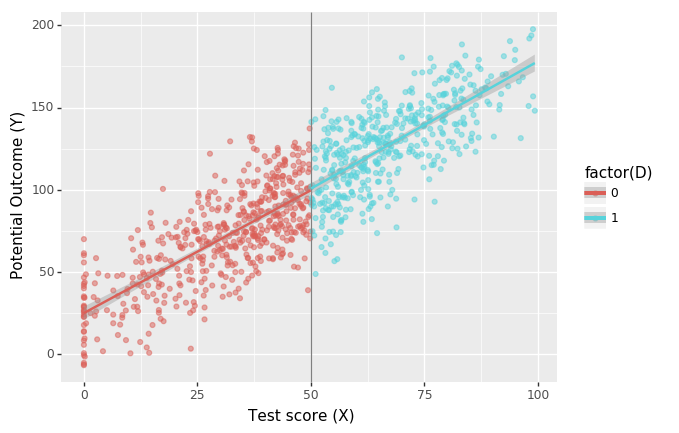

<ggplot: (-9223363273962575321)>

In [12]:
p.ggplot(dat, p.aes(x='x', y='y1', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.5) +\
    p.geom_vline(xintercept = 50, colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

"Counterfactual Potential Outcomes after Treatment


/Users/mpb798/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


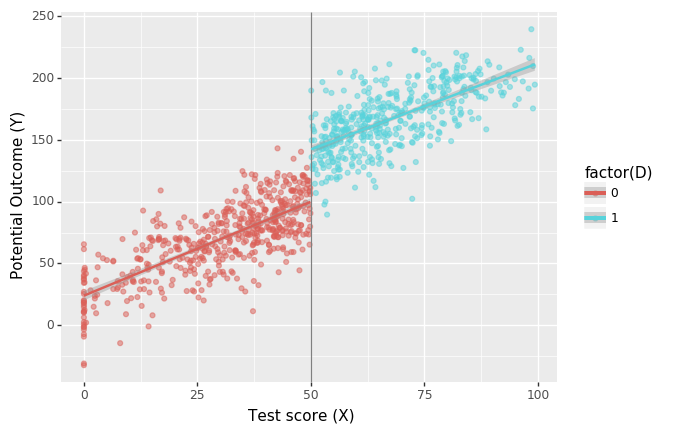

<ggplot: (8762892197615)>

In [13]:
print('"Counterfactual Potential Outcomes after Treatment')
p.ggplot(dat, p.aes(x='x', y='y2', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.5) +\
    p.geom_vline(xintercept = 50, colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

In [15]:


dat = pd.DataFrame({'x': np.random.normal(100, 50, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat['x2'] = dat['x']**2
dat['x3'] = dat['x']**3
dat['D'] = 0
dat.loc[dat.x>140, 'D'] = 1

dat['y3'] = 10000 + 0*dat.D - 100 * dat.x + dat.x2 + np.random.normal(0, 1000, dat.shape[0])
dat = dat[dat.x < 280]

/Users/mpb798/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


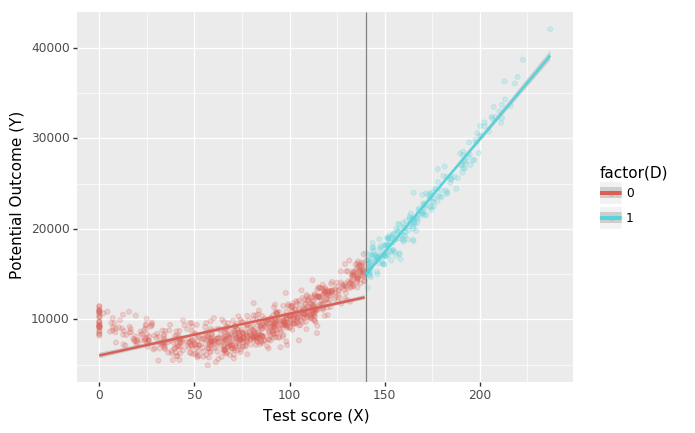

<ggplot: (-9223363273962576191)>

In [17]:
# Linear Model for conditional expectation
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.2) +\
    p.geom_vline(xintercept = 140, colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")


/Users/mpb798/anaconda/lib/python3.5/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/mpb798/anaconda/lib/python3.5/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


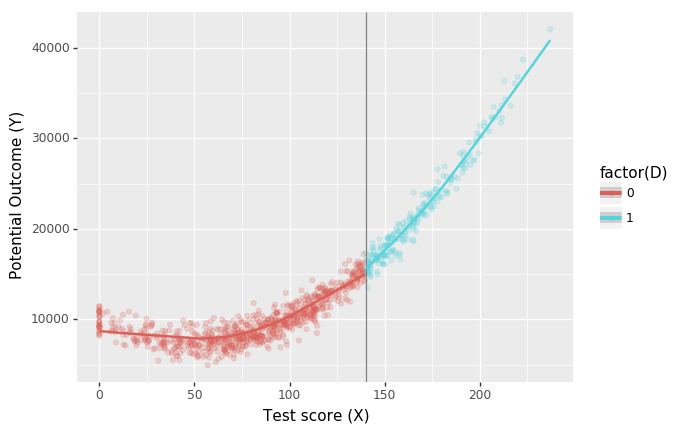

<ggplot: (8762892071835)>

In [21]:
# Linear Model for conditional expectation
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.2) +\
    p.geom_vline(xintercept = 140, colour = "grey") +\
    p.stat_smooth(method = "lowess", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")


#### Questions
- If you estimated the treatment effect using the linear model, would your treatment effect estimate be near the true treatment effect? 



In [27]:
np.random.seed(12282020)

# Fully interacted regression
all_columns = "+".join(dat.columns.difference(["D"]))
formula = 'y3 ~ D * ({})'.format(all_columns)

regression = sm.OLS.from_formula(formula, data = dat).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.157e+27
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:45:10   Log-Likelihood:                 18999.
No. Observations:                1000   AIC:                        -3.798e+04
Df Residuals:                     990   BIC:                        -3.793e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.434e-12   5.31e-10      0.008      0.993   -1.04e-09    1.05e-09
D            2.91e-10   3.93e-08      0.007      0.994   -7.69e-08    7.75e-08
x          -5.684e-14   1.29e-11     -0.004      0.996   -2.54e-11    2.53e-11
x2          6.106e-16   2.01e-13      0.003      0.998   -3.94e-13    3.96e-13
x3         -1.389e-15   9.08e-16     -1.530      0.126   -3.17e-15    3.92e-16
y3             1.0000   4.91e-14   2.04e+13      0.000       1.000       1.000
D:x        -4.547e-12   6.68e-10     -0.007      0.995   -1.32e-09    1.31e-09
D:x2        4.263e-14   3.75e-12      0.011      0.991   -7.31e-12     7.4e-12
D:x3        1.353e-15   6.99e-15      0.194      0.847   -1.24e-14    1.51e-14
D:y3        7.772e-16   1.07e-13      0.007      0.994   -2.09e-13     2.1e-13
==============================================================================
Omnibus:                       88.000   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.180
Skew:                           0.816   Prob(JB):                     7.21e-25
Kurtosis:                       2.951   Cond. No.                     3.28e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question
- What did you estimate as the treatment effect using a third order polynomial of the running variable? Is it statistically significantly different from zero?
- Does the estimated treatment effect seem correct from the graph?

## The Close Election Design

Lets load the data from Lee et. al. (2004):

In [77]:
def lm_robust(formula, data):
    regression = sm.OLS.from_formula(formula, data = data)
    regression = regression.fit(cov_type="cluster",cov_kwds={"groups":data['id']})
    return regression

In [78]:
#lmb_data = read_data("lmb-data.dta")
lmb_data = pd.read_stata("~/Downloads/lmb-data.dta")

In [79]:
lmb_data['demvoteshare_c'] = lmb_data['demvoteshare'] - 0.5
lmb_subset = lmb_data[lmb_data.lagdemvoteshare.between(.48, .52)]

In [80]:
lm_1 = lm_robust('score ~ lagdemocrat', data = lmb_subset)
lm_2 = lm_robust('score ~ democrat', data = lmb_subset)
lm_3 = lm_robust('democrat ~ lagdemocrat', data = lmb_subset)
print("Original results based on ADA Scores -- Close Elections Sample")
Stargazer([lm_1, lm_2, lm_3])

Original results based on ADA Scores -- Close Elections Sample


#### using all data (note data used is lmb_data, not lmb_subset)

In [81]:
lm_1 = lm_robust('score ~ lagdemocrat', data = lmb_data)
lm_2 = lm_robust('score ~ democrat', data = lmb_data)
lm_3 = lm_robust('democrat ~ lagdemocrat', data = lmb_data)
print("Original results based on ADA Scores -- Full Sample")
Stargazer([lm_1, lm_2, lm_3])

Original results based on ADA Scores -- Full Sample


In [88]:
# drop missing values
lmb_data = lmb_data[~pd.isnull(lmb_data.demvoteshare_c)]

In [89]:

lm_1 = lm_robust('score ~ lagdemocrat + demvoteshare_c', data = lmb_data)
lm_2 = lm_robust('score ~ democrat + demvoteshare_c', data = lmb_data)
print("Results based on ADA Scores -- Full Sample")
Stargazer([lm_1, lm_2])

Results based on ADA Scores -- Full Sample


In [90]:
lm_1 = lm_robust('score ~ lagdemocrat*demvoteshare_c', data = lmb_data)
lm_2 = lm_robust('score ~ democrat*demvoteshare_c', data = lmb_data)
lm_3 = lm_robust('democrat ~ lagdemocrat*demvoteshare_c', data = lmb_data)
print("Original results based on ADA Scores -- Full Sample with linear interactions")
Stargazer([lm_1, lm_2, lm_3])

Original results based on ADA Scores -- Full Sample with linear interactions


In [91]:
lmb_data['demvoteshare_sq'] = lmb_data['demvoteshare_c']**2

/Users/mpb798/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
lm_1 = lm_robust('score ~ lagdemocrat*demvoteshare_c + lagdemocrat*demvoteshare_sq', 
                 data = lmb_data)
lm_2 = lm_robust('score ~ democrat*demvoteshare_c + democrat*demvoteshare_sq', 
                 data = lmb_data)
lm_3 = lm_robust('democrat ~ lagdemocrat*demvoteshare_c + lagdemocrat*demvoteshare_sq', 
                 data = lmb_data)
print("Original results based on ADA Scores -- Full Sample with linear and quadratic interactions")
Stargazer([lm_1, lm_2, lm_3])

Original results based on ADA Scores -- Full Sample with linear and quadratic interactions


In [95]:
lmb_subset = lmb_data[lmb_data.lagdemvoteshare.between(.48, .52)]

In [96]:
lm_1 = lm_robust('score ~ lagdemocrat*demvoteshare_c + lagdemocrat*demvoteshare_sq', 
                 data = lmb_subset)
lm_2 = lm_robust('score ~ democrat*demvoteshare_c + democrat*demvoteshare_sq', 
                 data = lmb_subset)
lm_3 = lm_robust('democrat ~ lagdemocrat*demvoteshare_c + lagdemocrat*demvoteshare_sq', 
                 data = lmb_subset)
print("Results based on ADA Scores -- Close Sample with linear and quadratic interactions")
Stargazer([lm_1, lm_2, lm_3])

Results based on ADA Scores -- Close Sample with linear and quadratic interactions
